<a href="https://colab.research.google.com/github/pandeyanuradha/Structured-sentiment-analysis-using-Dependency-Graphs/blob/main/embeddings%20and%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links 
- https://medium.com/@aayanthi/bert-as-service-with-google-colab-e235472e108d
- https://github.com/Sougotadayglo/Bert-serving-client
- https://towardsdatascience.com/nlp-extract-contextualized-word-embeddings-from-bert-keras-tf-67ef29f60a7b
- https://www.machinecurve.com/index.php/2019/07/27/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch
!pip install transformers
!pip install sentence_transformers

In [ ]:
import numpy as np
import pandas as pd
import json
import ast
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers import Input, Dense
from keras.models import Model

from transformers import BertTokenizer, BertModel
import torch
from sentence_transformers import SentenceTransformer

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
%tensorflow_version 2.x

## Embeddings

In [ ]:
data = pd.read_csv("enBERT.csv")

In [ ]:
n = data.shape[0] 
data['embeddings'] = 0.0
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
data.head()

,Text,Source,Target,Polar_expression,Polarity,embeddings
0,I ’m definitely going there again whenever I g...,['I'],['there'],['definitely going again'],P,0.0
1,Have also stayed in other hotels and to me NH ...,['me'],['NH CARLTON'],['definitely the best'],P,0.0
2,Clean sizeable room with good facilities in th...,['we'],['facilities'],['good'],P,0.0
3,I know some people complained .,['I'],['some people'],['complained'],N,0.0
4,"Even though the price is decent for Paris , I ...",['I'],['this hotel'],['would not recommend'],N,0.0


In [ ]:
for i in range(n):
  data['Source'][i] = ast.literal_eval(data['Source'][i])[0]
  data['Target'][i] = ast.literal_eval(data['Target'][i])[0]
  data['Polar_expression'][i] = ast.literal_eval(data['Polar_expression'][i])[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
data.head()

,Text,Source,Target,Polar_expression,Polarity,embeddings
0,I ’m definitely going there again whenever I g...,I,there,definitely going again,P,0.0
1,Have also stayed in other hotels and to me NH ...,me,NH CARLTON,definitely the best,P,0.0
2,Clean sizeable room with good facilities in th...,we,facilities,good,P,0.0
3,I know some people complained .,I,some people,complained,N,0.0
4,"Even though the price is decent for Paris , I ...",I,this hotel,would not recommend,N,0.0


In [ ]:
ss1 = data['Source'].tolist()
ss2 = data['Target'].tolist()
ss3 = data['Polar_expression'].tolist()

In [ ]:
src = pd.DataFrame({'src' : ss1})
tar = pd.DataFrame({'tar' : ss2})
pe = pd.DataFrame({'pe' : ss3})

src['embeddings'] = 0.0
tar['embeddings'] = 0.0
pe['embeddings'] = 0.0

In [ ]:
src

,src,embeddings
0,I,0.0
1,me,0.0
2,we,0.0
3,I,0.0
4,I,0.0
...,...,...
107,I,0.0
108,I,0.0
109,I,0.0
110,I,0.0


In [ ]:
src = src.astype('object')
tar = tar.astype('object')
pe = pe.astype('object')

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
# Source

sentences_list = src['src'].to_list()

for i in range(len(sentences_list)):
  src['embeddings'][i] = sbert_model.encode(sentences_list[i])

In [ ]:
# Target

sentences_list = tar['tar'].to_list()

for i in range(len(sentences_list)):
  tar['embeddings'][i] = sbert_model.encode(sentences_list[i])

In [ ]:
# PE

sentences_list = pe['pe'].to_list()

for i in range(len(sentences_list)):
  pe['embeddings'][i] = sbert_model.encode(sentences_list[i])

In [ ]:
src

,src,embeddings
0,I,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
1,me,"[-0.07143029, -0.07826901, 2.3924668, 0.200721..."
2,we,"[0.29468173, -0.08528296, 2.5404243, 0.2709473..."
3,I,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
4,I,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
...,...,...
107,I,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
108,I,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
109,I,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
110,I,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."


In [ ]:
tar

,tar,embeddings
0,there,"[-0.1628256, -0.5033223, 2.711602, 0.318837, 0..."
1,NH CARLTON,"[-0.22411533, 0.38089377, 1.8834321, 0.7529253..."
2,facilities,"[0.16831996, -0.66065294, 2.4449732, 0.7648579..."
3,some people,"[1.0583004, -0.76588655, 1.8275316, 0.5232608,..."
4,this hotel,"[0.2005173, 0.5758789, 1.9732914, 0.2811503, 0..."
...,...,...
107,this hotel,"[0.2005173, 0.5758789, 1.9732914, 0.2811503, 0..."
108,the hostel,"[0.27161407, 0.72979796, 1.9679761, 0.24148129..."
109,time,"[0.057238743, -0.5590193, 2.6795752, 0.6519622..."
110,somewhere else,"[-0.090637214, -1.1629673, 2.066749, 0.4237642..."


In [ ]:
pe

,pe,embeddings
0,definitely going again,"[-0.017325666, -0.61608523, 2.9982598, 0.26401..."
1,definitely the best,"[-0.48895797, -0.185672, 2.0885615, 0.5091189,..."
2,good,"[-0.014264785, -0.33327988, 2.361286, 0.327870..."
3,complained,"[0.22673778, -0.0762411, 2.4817457, 0.28549138..."
4,would not recommend,"[0.39703166, 0.28836337, 1.9668276, 0.00047108..."
...,...,...
107,recommend,"[-0.44058272, -0.18186165, 2.5948792, 0.415013..."
108,recommend only for a short stay in the city,"[0.1842904, 0.24427706, 1.0056305, -0.0601895,..."
109,the most wonderfull,"[-0.1793495, -0.36845282, 2.0119567, 0.5332648..."
110,would stay,"[0.8931147, -0.2838391, 2.3876812, -0.359743, ..."


## MLP

In [ ]:
len(src['embeddings'][0])

768

In [ ]:
len(list(src['embeddings'][0]) + list(tar['embeddings'][0]) + list(pe['embeddings'][0]))

2304

In [ ]:
data.head()

,Text,Source,Target,Polar_expression,Polarity,embeddings
0,I ’m definitely going there again whenever I g...,I,there,definitely going again,P,0.0
1,Have also stayed in other hotels and to me NH ...,me,NH CARLTON,definitely the best,P,0.0
2,Clean sizeable room with good facilities in th...,we,facilities,good,P,0.0
3,I know some people complained .,I,some people,complained,N,0.0
4,"Even though the price is decent for Paris , I ...",I,this hotel,would not recommend,N,0.0


In [ ]:
data = data.astype('object')

In [ ]:
for i in range(data.shape[0]):
  data['embeddings'][i] = (list(src['embeddings'][i]) + list(tar['embeddings'][i]) + list(pe['embeddings'][i]))

In [ ]:
data.head()

,Text,Source,Target,Polar_expression,Polarity,embeddings
0,I ’m definitely going there again whenever I g...,I,there,definitely going again,P,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
1,Have also stayed in other hotels and to me NH ...,me,NH CARLTON,definitely the best,P,"[-0.07143029, -0.07826901, 2.3924668, 0.200721..."
2,Clean sizeable room with good facilities in th...,we,facilities,good,P,"[0.29468173, -0.08528296, 2.5404243, 0.2709473..."
3,I know some people complained .,I,some people,complained,N,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."
4,"Even though the price is decent for Paris , I ...",I,this hotel,would not recommend,N,"[0.042095993, -0.11055863, 2.5161955, 0.199010..."


In [ ]:
X = data['embeddings']
y = data['Polarity']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [ ]:
X

0      [0.042095993, -0.11055863, 2.5161955, 0.199010...
1      [-0.07143029, -0.07826901, 2.3924668, 0.200721...
2      [0.29468173, -0.08528296, 2.5404243, 0.2709473...
3      [0.042095993, -0.11055863, 2.5161955, 0.199010...
4      [0.042095993, -0.11055863, 2.5161955, 0.199010...
                             ...                        
107    [0.042095993, -0.11055863, 2.5161955, 0.199010...
108    [0.042095993, -0.11055863, 2.5161955, 0.199010...
109    [0.042095993, -0.11055863, 2.5161955, 0.199010...
110    [0.042095993, -0.11055863, 2.5161955, 0.199010...
111    [-0.07143029, -0.07826901, 2.3924668, 0.200721...
Name: embeddings, Length: 112, dtype: object

In [ ]:
X = np.vstack(X)

In [ ]:
y.shape

(112,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

In [ ]:
y_train = y_train.reshape(89, 1)
y_test = y_test.reshape(23, 1)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
feature_vector_length = 2304                # no. of features
num_classes = 2                             # binary classification
input_shape = (feature_vector_length, )

In [ ]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5)

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape = input_shape, activation = 'relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Configure the model and start training
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 250, verbose = 1, validation_split = 0.2, callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7008 - accuracy: 0.5070 - val_loss: 0.8788 - val_accuracy: 0.6111
Epoch 2/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5948 - accuracy: 0.7324 - val_loss: 0.5714 - val_accuracy: 0.6111
Epoch 3/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.3422 - accuracy: 0.7606 - val_loss: 0.4822 - val_accuracy: 0.7778
Epoch 4/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.2802 - accuracy: 0.9577 - val_loss: 0.4478 - val_accuracy: 0.7778
Epoch 5/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.2060 - accuracy: 0.9577 - val_loss: 0.4592 - val_accuracy: 0.7778
Epoch 6/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.1524 - accuracy: 0.9577 - val_loss: 0.4970 - val_accuracy: 0.7778
Epoch 7/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.1260 - accuracy: 0.9577 - val_loss: 0.5087 - val_accuracy: 0.7778
Epoch 8/1000
1/

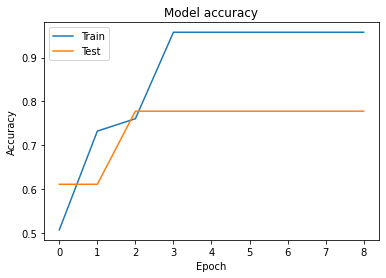

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_results = model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 23ms/step - loss: 0.7776 - accuracy: 0.7391


In [ ]:
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Test results - Loss: 0.777593195438385 - Accuracy: 0.739130437374115%
